# </font color=blue > Lucas Jose Chaves Hossi </font>

---
## Win the Stock Market!

Stock prices are often modeled by a particular set of <a href="https://en.wikipedia.org/wiki/Stochastic_process">stochastic processes</a> related to <a href="https://en.wikipedia.org/wiki/Brownian_motion">Brownian Motion</a>. Let's model a stock and find the best-fit line for the following data generated by a <a href="https://en.wikipedia.org/wiki/Wiener_process">Weiner Process, with drift</a>.

<img src="https://www.stockinvestor.com/wp-content/uploads/2016/12/will-stock-markets-soar-20-in-2017.jpg" height="300" width="80%">



In [1]:
# Put any relevant code examples or visualizations for your project here
## Import all necessary packages
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import set_matplotlib_formats

import seaborn as sns; sns.set()  
import sympy as sym
import pandas as pd
import numpy as np
import random
import copy

set_matplotlib_formats('pdf', 'svg')
sym.init_printing(use_unicode=True)
%matplotlib inline 

# Modeling our Stock prices

Text(0,0.5,'Stock Price in USD')

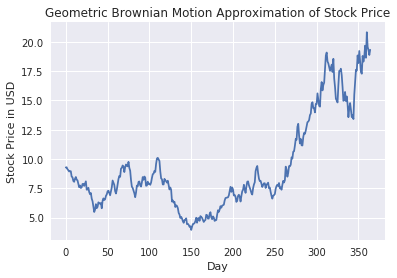

In [2]:


## Standardize randomness between runs
np.random.seed(89) # have fun experimenting with different Browning Motion paths by changing 52 to 50 or 77 or some other number 

## Parameters
N = 365 # number of days 
mu = 1 # mean
sigma = .86 # standard deviation
S0 = 10 # starting price

## Generate Time & Brownian Motion Path
time = np.linspace(0,N-1,N,dtype=np.int16) # N time points from 0 to N
b = S0*np.cumprod(np.exp((mu-0.5*sigma**2)*(1/N)+sigma*np.sqrt(1/N)*np.random.standard_normal(len(time)))) # Brownian Motion

## Plot
plt.plot(b)
plt.title('Geometric Brownian Motion Approximation of Stock Price')
plt.xlabel('Day')
plt.ylabel('Stock Price in USD')

# Masking part of the data

In [3]:
Stock=b[:300]

# Using polyfit

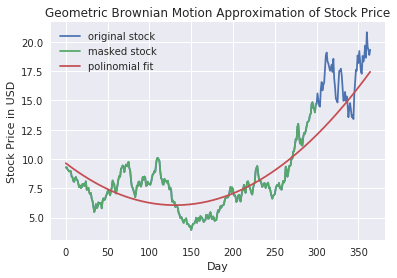

In [4]:
poly_parameters = np.polyfit(time[:300], Stock, 2)

# uncomment this code and pass in the parameters array to np.poly1d to create a regression function
my_poly_function =np.poly1d(poly_parameters)

# initialize our predicted y values from the my_poly_function created using np.poly1d
expected_y_poly = my_poly_function(time)

plt.plot(b,label='original stock')
plt.plot(Stock, label='masked stock')
plt.plot(time, expected_y_poly, label='polinomial fit')
plt.title('Geometric Brownian Motion Approximation of Stock Price')
plt.xlabel('Day')
plt.ylabel('Stock Price in USD')
plt.legend()
plt.show()

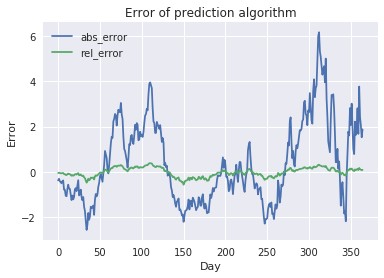

In [5]:
#calculating the absolute error and relative error of our predicted values using polyfit
abs_err_poly=b-expected_y_poly
rel_err_poly=abs_err_poly/b
plt.plot(time,abs_err_poly , label='abs_error')
plt.plot(time,rel_err_poly , label='rel_error')
plt.title('Error of prediction algorithm')
plt.xlabel('Day')
plt.ylabel('Error')
plt.legend()
plt.show()

### Monte Carlo Methods


- Used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty in prediction and forecasting models.


- Cannot produce results unless a considerable amount of information has been collected, or unless the analyst is willing to make several assumptions in the place of such empirical information


- Used for Risk assessment and Uncertainty calculations


- The more data points the better your approximation

### Modeling My Own Random Walks to predict prices

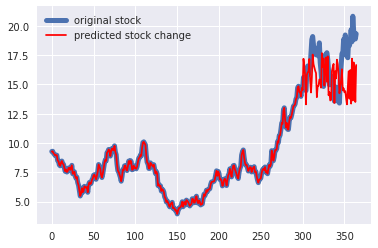

In [6]:
# tentative
current_price=Stock[len(Stock)-1]
rate= np.arange(-1.5,3,0.001)


def prices(n, current_price):
    #takes number of day to predict, starting price
    "trend on those days"
    prices=[]

    for i in range(n):
        trend = random.choice(rate)
        price=current_price+trend
        prices.append(price)
    return prices

trend= prices(65,current_price)
#trend
def stock(stock_data, trend_predicted):
    stock=stock_data.copy()
    stock=np.append(stock_data,trend_predicted)
    
    return stock

new_trend=stock(Stock,trend)
trend = np.matrix(new_trend).T

plt.plot(b, linewidth=5, label='original stock')
plt.plot(time,trend , c='red' , label='predicted stock change')
plt.legend()

In [7]:
#tranforming the list into an array for easy mathematical calculations
trend1=np.zeros(365)
for i in range(0,len(trend)):
    trend1[i]=trend[i]

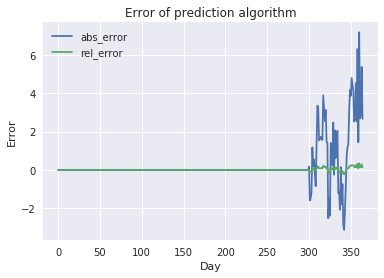

In [8]:
#calculating the absolute error and relative error of our predicted values using random walks
abs_err_rwalk=b-trend1
rel_err_rwalk=abs_err_rwalk/b
plt.plot(time,abs_err_rwalk , label='abs_error')
plt.plot(time,rel_err_rwalk , label='rel_error')
plt.title('Error of prediction algorithm')
plt.xlabel('Day')
plt.ylabel('Error')
plt.legend()
plt.show()

# Fourrier 

#### Fourier Prelude: Least Squares

What follows is, again, akin to that which we've already seen. And while it is very similar to a *Fourier Series*, what follows is not truly a <a href="https://en.wikipedia.org/wiki/Fourier_series">Fourier Series</a>, but a Least Squares solution that finds the coefficients, $x$, of the orthogonal projection of $b$ onto the space spanned by an orthonormal basis for $\mathcal{C}(C)$ of the form:

$$y_3 = x_0 + \sum_{i=1}^{k}x_i\cos(a_i\vec{\text{time}}) + \sum_{i=k+1}^{2k}x_i\sin(c_i\vec{\text{time}}), \quad x_i,a_i,c_i\in\mathbb{R}$$

Note, we are note determining the $a_i$ and $c_i$. These are *hyperparameters* in this model and are pre-chosen. (**Consider This**: What kind of algorithm could you build to choose the hyperparameters?) 

To relate this to what we previously did, we found coefficients, $x$, of the projection of $b$ onto the $span$ of a polynomial basis of the form:

$$y_2 = x_0 + \sum_{k=1}^{3}x_k\text{time}^k, \quad x_i\in\mathbb{R}$$

We now create the matrix, $A$ & $C$.

In [9]:
## Generate A matrix
A = np.ones((N,2)) # A's first column is ones
A[:,1] = time.copy() # A's second column is exactly the time vector 
A = np.matrix(A)

In [10]:
C = np.concatenate((A, np.sin(np.array(A[:,1])),np.sin(0.01*np.array(A[:,1])),
                    np.sin(0.4*np.array(A[:,1])),np.sin(0.0002*np.array(A[:,1])),np.cos(np.array(A[:,1])),
                    np.cos(0.01*np.array(A[:,1])),np.cos(0.4*np.array(A[:,1])),np.cos(0.0002*np.array(A[:,1]))), axis=1)

 Now projecting the vector $trend$ onto $\mathcal{C}(C)$ 

In [11]:
fit=(C.T*C).I*C.T*trend
y_vals=C*fit


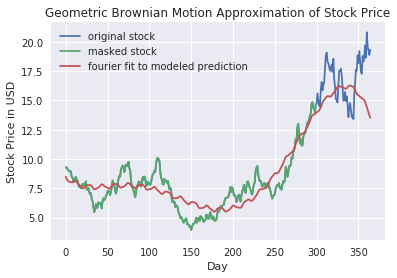

In [12]:
plt.plot(b, label='original stock')
plt.plot(Stock, label='masked stock')
plt.plot(time, y_vals, label='fourier fit to modeled prediction')
plt.title('Geometric Brownian Motion Approximation of Stock Price')
plt.xlabel('Day')
plt.ylabel('Stock Price in USD')
plt.legend()
plt.show()

In [24]:
#tranforming the list into an array for easy mathematical calculations
Y_vals=np.zeros(365)
for i in range(0,len(y_vals)):
    Y_vals[i]=y_vals[i]

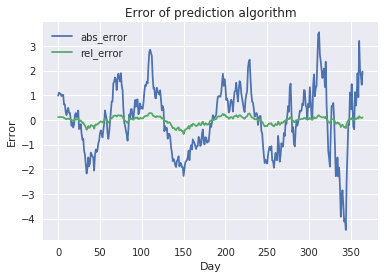

In [29]:
#calculating the absolute error and relative error of our predicted values using fourier
abs_err_fourier=b-y_vals
rel_err_fourier=abs_err_fourier/b
plt.plot(time,abs_err_fourier , label='abs_error')
plt.plot(time,rel_err_fourier , label='rel_error')
plt.title('Error of prediction algorithm')
plt.xlabel('Day')
plt.ylabel('Error')
plt.legend()
plt.show()

For comparison, lets apply the fourier to our original data:

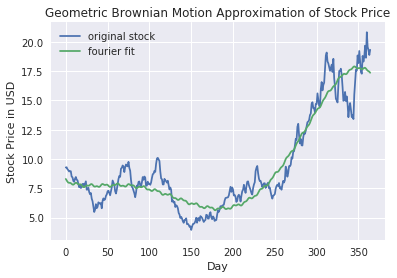

In [16]:
b=np.matrix(b.T)
fit=(C.T*C).I*C.T*b
y_vals=C*fit

plt.plot(b, label='original stock')
plt.plot(time, y_vals, label='fourier fit')
plt.title('Geometric Brownian Motion Approximation of Stock Price')
plt.xlabel('Day')
plt.ylabel('Stock Price in USD')
plt.legend()
plt.show()

#for some odd reason this code tends to give an error on the first run but then on the second run it works fine

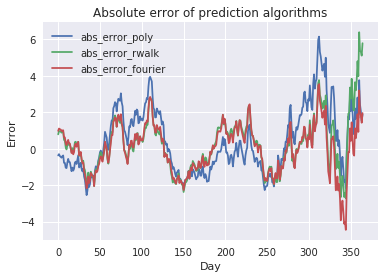

In [32]:

#calculating the absolute error and relative error of our predicted values using polyfit
plt.plot(time,abs_err_poly , label='abs_error_poly')
plt.plot(time,abs_err_rwalk , label='abs_error_rwalk')
plt.plot(time,abs_err_fourier , label='abs_error_fourier')
plt.title('Absolute error of prediction algorithms')
plt.xlabel('Day')
plt.ylabel('Error')
plt.legend()
plt.show()

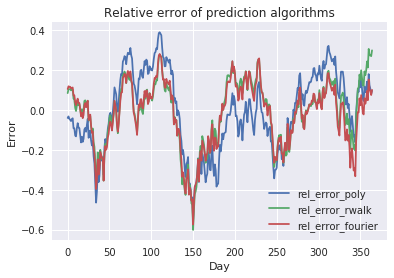

In [33]:
plt.plot(time,rel_err_poly , label='rel_error_poly')
plt.plot(time,rel_err_rwalk , label='rel_error_rwalk')
plt.plot(time,rel_err_fourier , label='rel_error_fourier')
plt.title('Relative error of prediction algorithms')
plt.xlabel('Day')
plt.ylabel('Error')
plt.legend()
plt.show()

---
# Concluding Discussion and Future Work

***After all the testing and analyzing the results, I came to the conclusion that using polynomial fit to our data for prediction is not a good way to go about it as the polynomial graph will tend to go the either extreme (negative infinity or positive infinity). Then my modell of random walks by itself does not provide me with the best approach, however, when i use a fourier fit to the results of my model I get a much better approximation compared to the trend on the original data***

***I believe things went pretty well on this project, but there is always room for improvement. Some other things to improve on this project is the prediction algorithm where we could possibly use some machine learning because the usage of random numbers by itself is not producing very satisfactory results ***

----

# References

* Dirk Colbry

* Ekaterina Rapinchuk

* http://1.bp.blogspot.com/-b0blf46njtE/UJqHdwPndbI/AAAAAAAABxE/2LAB0P5kdxw/s1600/Monte+Carlo+Part+3.gif

* https://www.investopedia.com/terms/m/montecarlosimulation.asp